In [6]:
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install pandas

In [7]:
import seaborn as sbn

In [8]:
df = sbn.load_dataset('titanic')

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Imputation Missing Values Techniques
  - using Mean
  - using Median
  - using Mode

In [12]:
df.shape

(891, 15)

In [13]:
df.dropna().shape

(182, 15)

In [17]:
# Eliminate Columns consisting of Null values

df.dropna(axis=1).head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


### using Mean Value Imputation

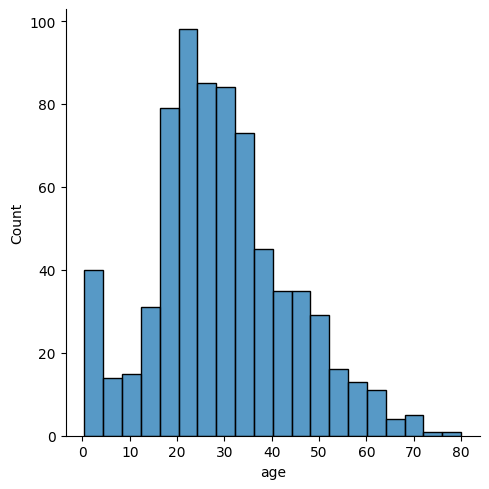

In [19]:
sbn.displot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

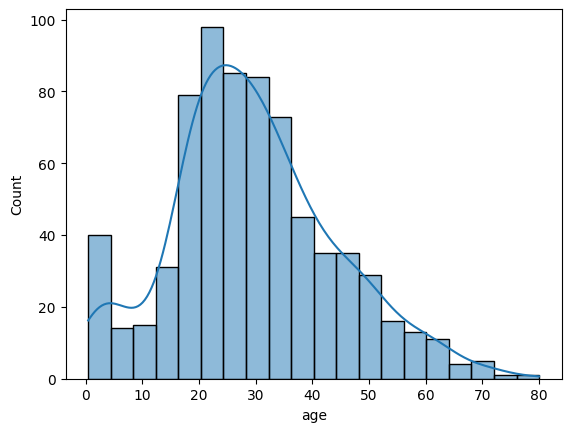

In [20]:
sbn.histplot(df['age'], kde=True)

In [26]:
# df['age'].fillna(df['age'].mean(), inplace=True)
df['Age_Mean'] = df['age'].fillna(df['age'].mean())
df[['age', 'Age_Mean']]

,age,Age_Mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [30]:
print(df["age"].isnull().sum())
print(df.Age_Mean.isnull().sum())

177
0



### using Median Value Imputation

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [42]:
# # df.deck.fillna(df['deck'].median(), inplace=True)
# df['Deck_Median'] = df["deck"].fillna(df['deck'].median())
# df[['deck', 'Deck_Median']]

# df['age'].fillna(df['age'].median(), inplace=True)
df['Age_Median'] = df['age'].fillna(df['age'].median())
df[['age', 'Age_Median']]


,age,Age_Median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


In [43]:
print(df["age"].isnull().sum())
print(df.Age_Median.isnull().sum())

177
0


### using Mode value Imputation

In [45]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
df[df['embarked'].notna()]['embarked'].mode()[0]

'S'

In [44]:
# df.embarked.fillna(df["embarked"].mode()[0], inplace=True)
df["Embarked_Mode"] = df.embarked.fillna(df["embarked"].mode()[0])
df[['embarked', 'Embarked_Mode']]

,embarked,Embarked_Mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [53]:
print(df.embarked.isnull().sum())
df.Embarked_Mode.isnull().sum()

2


np.int64(0)

<Axes: xlabel='age', ylabel='Count'>

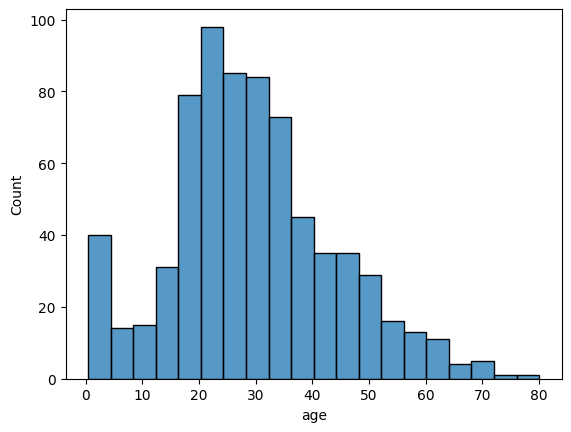

In [58]:
import seaborn as sns
sns.histplot(data=df, x="age", bins=20, kde=False)